This notebook reads in the CDF files and makes the plots for the CDFs at 150pc. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from astropy import table
from astropy.table import Table, join
from astropy.io import ascii
import astropy.io.fits as pyfits

import os

import sys
sys.path.append('/home/mayker.1/Desktop/NessPythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/NessPythonFunctions')
from detectionFraction import detecFrac
from cumulativeDistFunc import makeCDF
from findPercentiles import findStats
from flattenList import flatten

In [8]:
# Convert MGSD to Mass

area = (150.0/2.0)**2*np.pi/np.log(2.0)

def mgsd2mass(x):
    y = np.log10(area) + x
    return(y)

def mass2mgsd(x):
    y = x - np.log10(area)
    return(y)

def makeLog(inputArr):
    outputArr = []
    for i in range(len(inputArr)):
        if(inputArr[i] <= 1.0):
            outputArr.append(0.0)
        else:
            outputArr.append(np.log10(inputArr[i])) 
    return(outputArr)



In [20]:
# Import supernovae CDFs

SNeCDFsFile   = "../Data/3.2a.SNeCDFs.fits"
SNeCDFs = Table.read(SNeCDFsFile)

CDFdetection, ydetection = SNeCDFs["Detections"][0], SNeCDFs["Detections"][1]
CDFdetection_mgsd_ca, ydetection_mgsd_ca = SNeCDFs["Detections"][2], SNeCDFs["Detections"][3]
CDFdetection_mgsd_mda, ydetection_mgsd_mda = SNeCDFs["Detections"][4], SNeCDFs["Detections"][5] 

CDFnondetection, ynondetection = SNeCDFs["NonDetections"][0], SNeCDFs["NonDetections"][1]
CDFnondetection_mgsd_ca, ynondetection_mgsd_ca = SNeCDFs["NonDetections"][2], SNeCDFs["NonDetections"][3]
CDFnondetection_mgsd_mda, ynondetection_mgsd_mda = SNeCDFs["NonDetections"][4], SNeCDFs["NonDetections"][5]

CDFdetectionII, ydetectionII = SNeCDFs["DetectionsII"][0], SNeCDFs["DetectionsII"][1]
CDFdetectionII_mgsd_ca, ydetectionII_mgsd_ca = SNeCDFs["DetectionsII"][2], SNeCDFs["DetectionsII"][3]
CDFdetectionII_mgsd_mda, ydetectionII_mgsd_mda = SNeCDFs["DetectionsII"][4], SNeCDFs["DetectionsII"][5] 

CDFnondetectionII, ynondetectionII = SNeCDFs["NonDetectionsII"][0], SNeCDFs["NonDetectionsII"][1]
CDFnondetectionII_mgsd_ca, ynondetectionII_mgsd_ca = SNeCDFs["NonDetectionsII"][2], SNeCDFs["NonDetectionsII"][3]
CDFnondetectionII_mgsd_mda, ynondetectionII_mgsd_mda = SNeCDFs["NonDetectionsII"][4], SNeCDFs["NonDetectionsII"][5]

CDFdetectionIa, ydetectionIa = SNeCDFs["DetectionsIa"][0], SNeCDFs["DetectionsIa"][1]
CDFdetectionIa_mgsd_ca, ydetectionIa_mgsd_ca = SNeCDFs["DetectionsIa"][2], SNeCDFs["DetectionsIa"][3]
CDFdetectionIa_mgsd_mda, ydetectionIa_mgsd_mda = SNeCDFs["DetectionsIa"][4], SNeCDFs["DetectionsIa"][5] 

CDFnondetectionIa, ynondetectionIa = SNeCDFs["NonDetectionsIa"][0], SNeCDFs["NonDetectionsIa"][1]
CDFnondetectionIa_mgsd_ca, ynondetectionIa_mgsd_ca = SNeCDFs["NonDetectionsIa"][2], SNeCDFs["NonDetectionsIa"][3]
CDFnondetectionIa_mgsd_mda, ynondetectionIa_mgsd_mda = SNeCDFs["NonDetectionsIa"][4], SNeCDFs["NonDetectionsIa"][5]

CDFdetectionIbc, ydetectionIbc = SNeCDFs["DetectionsIbc"][0], SNeCDFs["DetectionsIbc"][1]
CDFdetectionIbc_mgsd_ca, ydetectionIbc_mgsd_ca = SNeCDFs["DetectionsIbc"][2], SNeCDFs["DetectionsIbc"][3]
CDFdetectionIbc_mgsd_mda, ydetectionIbc_mgsd_mda = SNeCDFs["DetectionsIbc"][4], SNeCDFs["DetectionsIbc"][5] 

CDFnondetectionIbc, ynondetectionIbc = SNeCDFs["NonDetectionsIbc"][0], SNeCDFs["NonDetectionsIbc"][1]
CDFnondetectionIbc_mgsd_ca, ynondetectionIbc_mgsd_ca = SNeCDFs["NonDetectionsIbc"][2], SNeCDFs["NonDetectionsIbc"][3]
CDFnondetectionIbc_mgsd_mda, ynondetectionIbc_mgsd_mda = SNeCDFs["NonDetectionsIbc"][4], SNeCDFs["NonDetectionsIbc"][5]

CDFdetectionUnC, ydetectionUnC = SNeCDFs["DetectionsUnC"][0], SNeCDFs["DetectionsUnC"][1]
CDFdetectionUnC_mgsd_ca, ydetectionUnC_mgsd_ca = SNeCDFs["DetectionsUnC"][2], SNeCDFs["DetectionsUnC"][3]
CDFdetectionUnC_mgsd_mda, ydetectionUnC_mgsd_mda = SNeCDFs["DetectionsUnC"][4], SNeCDFs["DetectionsUnC"][5] 

CDFnondetectionUnC, ynondetectionUnC = SNeCDFs["NonDetectionsUnC"][0], SNeCDFs["NonDetectionsUnC"][1]
CDFnondetectionUnC_mgsd_ca, ynondetectionUnC_mgsd_ca = SNeCDFs["NonDetectionsUnC"][2], SNeCDFs["NonDetectionsUnC"][3]
CDFnondetectionUnC_mgsd_mda, ynondetectionUnC_mgsd_mda = SNeCDFs["NonDetectionsUnC"][4], SNeCDFs["NonDetectionsUnC"][5]

# Import All Pixel CDFs

CDFAPIFile    = "../Data/3.2a_CDFAllPixelsInts.fits"
CDFAPLFile    = "../Data/3.2a_CDFAllPixelsLims.fits"
CDFAPIcaFile  = "../Data/3.2a_CDFAllPixelsInts_ca.fits"
CDFAPLcaFile  = "../Data/3.2a_CDFAllPixelsLims_ca.fits"
CDFAPImdaFile = "../Data/3.2a_CDFAllPixelsInts_mgsd_mda.fits"
CDFAPLmdaFile = "../Data/3.2a_CDFAllPixelsLims_mgsd_mda.fits"

CDFAPI    = Table.read(CDFAPIFile)
CDFAPL    = Table.read(CDFAPLFile) 
CDFAPIca  = Table.read(CDFAPIcaFile) 
CDFAPLca  = Table.read(CDFAPLcaFile) 
CDFAPImda = Table.read(CDFAPImdaFile) 
CDFAPLmda = Table.read(CDFAPLmdaFile) 

APIx, APIy = CDFAPI["CDFAllPixelsInts"][0], CDFAPI["CDFAllPixelsInts"][1]
APIx_mgsd_ca, APIy_mgsd_ca = CDFAPIca["CDFAllPixelsInts_ca"][0], CDFAPIca["CDFAllPixelsInts_ca"][1]
APIx_mgsd_mda, APIy_mgsd_mda = CDFAPImda["CDFAllPixelsInts_mgsd_mda"][0], CDFAPImda["CDFAllPixelsInts_mgsd_mda"][1]

APLx, APLy = CDFAPL["CDFAllPixelsLims"][0], CDFAPL["CDFAllPixelsLims"][1]
APLx_mgsd_ca, APLy_mgsd_ca = CDFAPLca["CDFAllPixelsLims_ca"][0], CDFAPLca["CDFAllPixelsLims_ca"][1]
APLx_mgsd_mda, APLy_mgsd_mda = CDFAPLmda["CDFAllPixelsLims_mgsd_mda"][0], CDFAPLmda["CDFAllPixelsLims_mgsd_mda"][1]


Text(90, 129, '$\\alpha_{CO}$: Sun+20')

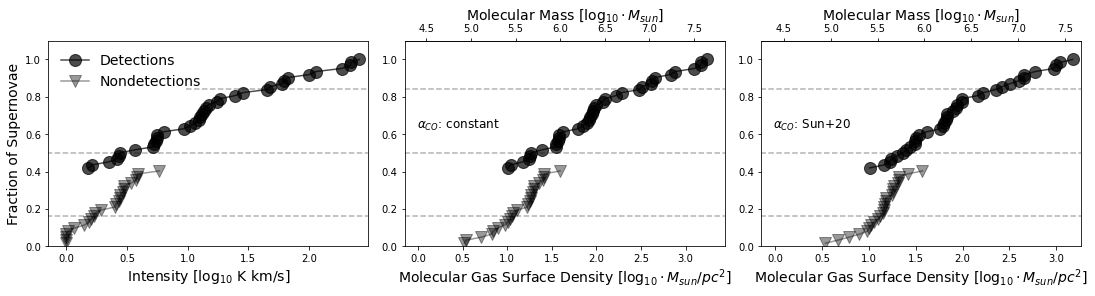

In [28]:
# Convert functions to log for plot

logCDFnondetection          = makeLog(CDFnondetection)
logCDFnondetection_mgsd_ca  = makeLog(CDFnondetection_mgsd_ca)
logCDFnondetection_mgsd_mda = makeLog(CDFnondetection_mgsd_mda)
logCDFdetection             = makeLog(CDFdetection)
logCDFdetection_mgsd_ca     = makeLog(CDFdetection_mgsd_ca)
logCDFdetection_mgsd_mda    = makeLog(CDFdetection_mgsd_mda)

ms = 12
fs = 14

fig, axs = plt.subplots(1, 3, sharex=False, constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].plot(logCDFdetection, ydetection, color = 'k', marker = 'o', label = 'Detections', ms = ms, alpha = 0.7)
axs[0].plot(logCDFnondetection, ynondetection, color = 'k', marker = 'v', ms = ms, label = 'Nondetections', alpha = 0.4)
axs[0].axhline(y=0.16, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=0.43, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].legend(frameon=False,loc='upper left', fontsize = fs,facecolor='white', framealpha=1)
axs[0].set_xlim(-0.15, np.log10(CDFdetection[-1] + 50))
axs[0].set_xlabel(r'Intensity [$\log_{10}$ K km/s]', fontsize = fs)
axs[0].set_ylabel('Fraction of Supernovae', fontsize = fs)
axs[0].set_ylim(0.0, 1.1)


axs[1].plot(logCDFdetection_mgsd_ca, ydetection_mgsd_ca, color = 'k',marker = 'o', ms = ms, alpha = 0.7)
axs[1].plot(logCDFnondetection_mgsd_ca, ynondetection_mgsd_ca, color = 'k', marker = 'v', ms = ms, alpha = 0.4)
axs[1].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
secax1 = axs[1].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
axs[1].annotate(r'$\alpha_{CO}$: constant', xy=(95, 129), xycoords='axes points',
            size=12, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
secax1.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = fs)
axs[1].set_xlim(-0.15, np.log10(CDFdetection_mgsd_ca[-1] + 1000))
axs[1].set_ylim(0.0, 1.1)


axs[2].plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, marker = 'o', ms = ms, color = 'k', alpha = 0.7)
axs[2].plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, marker = 'v',color = 'k', ms = ms, alpha = 0.4)
axs[2].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_mda[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
secax2 = axs[2].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax2.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = fs)
axs[2].set_xlim(-0.15, np.log10(CDFdetection_mgsd_ca[-1] + 100))
axs[2].set_ylim(0.0, 1.1)
axs[2].annotate(r'$\alpha_{CO}$: Sun+20', xy=(90, 129), xycoords='axes points',
            size=12, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))



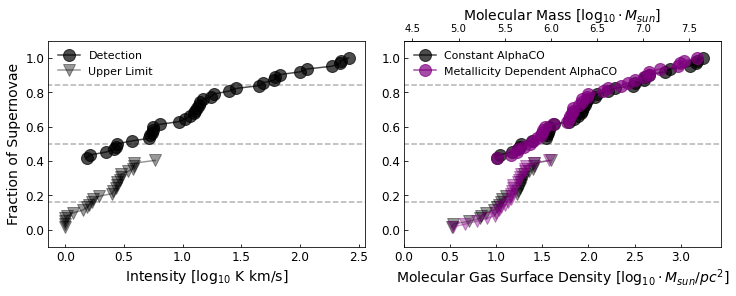

In [29]:
# Put alphaCOs on same plot

ms = 12
fs = 14

fig, axs = plt.subplots(1,2, sharex=False, constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(10)
axs[0].plot(logCDFdetection, ydetection, color = 'k', marker = 'o', label = 'Detection', ms = ms, alpha = 0.7)
axs[0].plot(logCDFnondetection, ynondetection, color = 'k', marker = 'v', ms = ms, label = 'Upper Limit', alpha = 0.4)
axs[0].axhline(y=0.16, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=-0.3, xmax = CDFdetection[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].legend(frameon=False,loc='upper left', fontsize = 11,facecolor='white', framealpha=1)
axs[0].set_xlim(-0.15, np.log10(CDFdetection[-1] + 100))
axs[0].set_xlabel(r'Intensity [$\log_{10}$ K km/s]', fontsize = fs)
axs[0].set_ylabel('Fraction of Supernovae', fontsize = fs)
axs[0].tick_params(axis='both', direction = "in", labelsize = 12)
axs[0].set_ylim(-0.1, 1.1)


axs[1].plot(logCDFdetection_mgsd_ca, ydetection_mgsd_ca, color = 'k',marker = 'o', ms = ms, alpha = 0.7, label="Constant AlphaCO")
axs[1].plot(logCDFnondetection_mgsd_ca, ynondetection_mgsd_ca, color = 'k', marker = 'v', ms = ms, alpha = 0.4)
axs[1].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetection_mgsd_ca[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = fs)
secax1 = axs[1].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax1.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = fs)
axs[1].set_xlim(0.0, np.log10(CDFdetection_mgsd_ca[-1] + 1000))
axs[1].set_ylim(-0.1, 1.1)
axs[1].plot(logCDFdetection_mgsd_mda, ydetection_mgsd_mda, marker = 'o', ms = ms, color = 'purple', alpha = 0.7, label="Metallicity Dependent AlphaCO")
axs[1].plot(logCDFnondetection_mgsd_mda, ynondetection_mgsd_mda, marker = 'v',color = 'purple', ms = ms, alpha = 0.4)
axs[1].legend(frameon=False,loc='upper left', fontsize = 11,facecolor='white', framealpha=1)
axs[1].tick_params(axis='both', direction = "in", labelsize = 12)

plt.savefig('../Figures/COEmissionCDFs.png')

In [ ]:
        
        
# Will probably need       
#     area = (150.0/2.0)**2*np.pi/np.log(2.0)

#     hdulist2  = pyfits.open(errimage)
#     map2      = hdulist2[0].data

#     if(alphaCOimg) != 'no file':
#         hdulist3  = pyfits.open(alphaCOimg)
#         map3      = hdulist3[0].data
#         # make mass map
#         map4      = map * map3 * area
#     else: map4 = map * 6.7 * area
    
#     wcs      = WCS(hdulist[0].header, naxis=2)
#     naxis    = wcs._naxis # size of image naxis[0] = x and [1] = y
#     grid     = np.indices((naxis[1],naxis[0]))
#     ra, dec  = wcs.wcs_pix2world(grid[1],grid[0],0)

#     #deproject ra and dec to dx and dy
#     radius, projang, dx, dy = deproject(center_coord=centerCoord, incl=incl, pa=pa, ra=ra, dec=dec,return_offset=True)
#     plt.imshow(map, origin='lower', interpolation='nearest', zorder=1)
    
    #flatten data structures 
#     f_err  = map2.flatten()
#     f_mass = map4.flatten()
#     f_ra   = ra.flatten()
#     f_dec  = dec.flatten()    
#     f_dx   = dx.flatten()
#     f_dy   = dy.flatten()
        
#     if(alphaCOimg) != 'no file':
#         f_aco = map3.flatten()
        
    
    #remove nans
#    keep  = np.where(np.isfinite(f_int))
#     ra    = f_ra[keep]
#     dec   = f_dec[keep]
#     inten = f_int[keep]
#     err   = f_err[keep]
#     mass  = f_mass[keep]
#     dx    = f_dx[keep]
#     dy    = f_dy[keep]
    
#     if(alphaCOimg) != 'no file':
#         aco   = f_aco[keep]
#     else:
#         aco = []
#         for i in range(len(err)):
#             aco.append(6.7)
    
#     SNR = []
#     for i in range(len(inten)):
#         if err[i] == 0.0:
#             SNR.append(0.0)
#         elif inten[i] < 0.0:
#             SNR.append(0.0)           
#         else:
#             SNR.append(inten[i]/err[i])       
    
#     return(inten, err, aco, mass, SNR, ra, dec, dx, dy)




In [ ]:
#losDetecCDFs, ylosDetec, losNoDetecCDFs, ylosNoDetec = np.genfromtxt('../Data/universalCDF.txt', dtype = object, unpack=True, delimiter = ' ', usecols=(0,1,2,3))
ints, uncerts, alphas = np.genfromtxt('../Data/allIntVals.txt', unpack=True, usecols=(1,2,3))

# make universal CDF
intDetec, intNoDetec, alphaDetec, alphaNoDetec = [],[],[],[]

for i in range(len(ints)):
    intensity = ints[i]
    uncert = uncerts[i]
    
    if uncert == 0.0:
        ratio = 0.0
    else:
        ratio = intensity/uncert

    if ratio >= 3.0:
        intDetec.append(intensity)
        alphaDetec.append(alphas[i])
    else:
        intNoDetec.append(3.0 * uncert)
        alphaNoDetec.append(alphas[i])


In [ ]:
# make CDFs for figure 2

#Plot 1: Intensity
frac = len(intNoDetec)/(len(intNoDetec + intDetec))    

detecCDF,   ydetec   = makeCDF(intDetec, min=frac)
nodetecCDF, ynodetec = makeCDF(intNoDetec, min = 0.0, max=frac) 

lognodetecCDF = makeLog(nodetecCDF)
logdetecCDF   = makeLog(detecCDF)

#Plot 2: Sigma Mol(Constant alpha CO)
sigmaDetec, sigmaNoDetec = [],[]

for i in range(len(detecCDF)):
    sigmaDetec.append(detecCDF[i] * alphaCO)
for i in range(len(nodetecCDF)):
    sigmaNoDetec.append(nodetecCDF[i] * alphaCO)

logSigmaDetecCDF   = makeLog(sigmaDetec)
logSigmaNoDetecCDF = makeLog(sigmaNoDetec)


#Plot 3: Sigma Mol(alpha CO Sun+20)
sigmaDetecSun, sigmaNoDetecSun = [],[]
for i in range(len(intDetec)):
    sigmaDetecSun.append(intDetec[i]*alphaDetec[i])
for i in range(len(intNoDetec)):
    sigmaNoDetecSun.append(intNoDetec[i]*alphaNoDetec[i])

sigmaDetecSunCDF,   ysigdetec   = makeCDF(sigmaDetecSun, min=frac)
sigmaNoDetecSunCDF, ysignodetec = makeCDF(sigmaNoDetecSun, min = 0.0, max=frac) 

logSigmaDetecSunCDF   = makeLog(sigmaDetecSunCDF)
logSigmaNoDetecSunCDF = makeLog(sigmaNoDetecSunCDF)

In [ ]:
# Make Figure 2
fig, axs = plt.subplots(1, 3, sharex=False, constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(15)

axs[0].plot(logdetecCDF, ydetec, color = 'dimgrey', linestyle = '-', label = 'Pixels with SNR >= 3')
axs[0].plot(lognodetecCDF, ynodetec, color = 'darkgrey', linestyle = '-', label = 'Pixels with SNR < 3')
axs[0].plot(logCDFa, ydetec1, color = 'darkslateblue',marker = 'o', ms = 12, alpha = 0.9, label = 'CO Detections')
axs[0].plot(logCDF1, ynodetec1, color = 'darkslateblue', marker = 'v', ms = 12, alpha = 0.6, label = 'CO Nondetections')
axs[0].plot(logCDFa, ydetec1, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)
axs[0].plot(logCDF1, ynodetec1, color = 'None', marker = 'v', ms = 12, mec = 'k', mew = 0.4)
axs[0].axhline(y=0.16, xmin=-0.3, xmax = 0.4, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = CDFdetec1[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=-0.3, xmax = CDFdetec1[-1]+50, ls = '--', color = 'k', alpha = 0.3)
axs[0].legend(frameon=False,loc='best', fontsize = 12,facecolor='white', framealpha=1)
axs[0].set_xlim(-0.15, np.log10(CDFdetec1[-1] + 50))
axs[0].set_xlabel(r'Intensity [$\log_{10}$ K km/s]', fontsize = 14)
axs[0].set_ylabel('Fraction of Supernovae', fontsize = 14)
axs[0].annotate('150pc', xy=(55, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs[0].grid(True, alpha = 0.25)
axs[0].set_ylim(0.0, 1.1)

axs[1].plot(logSigmaDetecCDF, ydetec, color = 'dimgrey', linestyle = '-')
axs[1].plot(logSigmaNoDetecCDF, ynodetec, color = 'darkgrey', linestyle = '-')
axs[1].plot(np.log10(CDFdetec2), ydetec2, color = 'darkslateblue',marker = 'o', ms = 12, alpha = 0.9)
axs[1].plot(logCDF2, ynodetec2, color = 'darkslateblue', marker = 'v', ms = 12, alpha = 0.6)
axs[1].plot(np.log10(CDFdetec2), ydetec2, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)
axs[1].plot(logCDF2, ynodetec2, color = 'None', marker = 'v', ms = 12, mec = 'k', mew = 0.4)
axs[1].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetec2[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetec2[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetec2[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
secax1 = axs[1].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
axs[1].annotate(r'$\alpha_{CO}$: constant', xy=(110, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
secax1.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 14)
axs[1].set_xlim(-0.15, np.log10(CDFdetec2[-1] + 1000))
axs[1].grid(True, alpha = 0.25)
axs[1].set_ylim(0.0, 1.1)

axs[2].plot(logSigmaDetecSunCDF, ysigdetec, color = 'dimgrey', linestyle = '-')
axs[2].plot(logSigmaNoDetecSunCDF, ysignodetec, color = 'darkgrey', linestyle = '-')
axs[2].plot(np.log10(CDFdetec3), ydetec3, color = 'darkslateblue',marker = 'o', ms = 12, alpha = 0.9)
axs[2].plot(logCDF3, ynodetec3, color = 'darkslateblue', marker = 'v', ms = 12, alpha = 0.6)
axs[2].plot(np.log10(CDFdetec3), ydetec3, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)
axs[2].plot(logCDF3, ynodetec3, color = 'None', marker = 'v', ms = 12, mec = 'k', mew = 0.4)
axs[2].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetec3[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetec3[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetec3[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
secax2 = axs[2].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax2.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 14)
axs[2].set_xlim(-0.15, np.log10(CDFdetec2[-1] + 100))
axs[2].set_ylim(0.0, 1.1)
axs[2].grid(True, alpha = 0.25)
axs[2].annotate(r'$\alpha_{CO}$: Sun+20', xy=(105, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))

plt.savefig('../Figures/COEmissionCDFs.png')



In [ ]:

Yarray1b = np.concatenate((ynodetec, ydetec))
Xarray1b = np.concatenate((lognodetecCDF, logdetecCDF))

Yarray1 = np.concatenate((ynodetec1, ydetec1))
Xarray1 = np.concatenate((logCDF1, logCDFa))

Xarray2b = np.concatenate((logSigmaNoDetecCDF, logSigmaDetecCDF))
Xarray3b = np.concatenate((logSigmaNoDetecSunCDF, logSigmaDetecSunCDF))

Yarray2 = np.concatenate((ynodetec2, ydetec2))
Xarray2 = np.concatenate((logCDF2, np.log10(CDFdetec2)))

Yarray3 = np.concatenate((ynodetec3, ydetec3))
Xarray3 = np.concatenate((logCDF3, np.log10(CDFdetec3)))


stats1  = findStats(Yarray1, Xarray1)
stats2  = findStats(Yarray2, Xarray2)
stats3  = findStats(Yarray3, Xarray3)
stats1b  = findStats(Yarray1b, Xarray1b)
stats2b  = findStats(Yarray1b, Xarray2b)
stats3b  = findStats(Yarray1b, Xarray3b)

print("Topic   Percentiles:[0.05, 0.16, 0.50, 0.84, 0.95]")
print("All Intensity:", stats1b)
print("SNe Intensity:", stats1)
print()
print("All Constant AlphaCO:", stats2b)
print("Constant AlphaCO:", stats2)
print()
print("All Sun+20 AlphaCO:", stats3b)
print("Sun+20 AlphaCO:", stats3)

print(np.mean(Xarray3b))
print(np.mean(Xarray3))

In [ ]:
logCDF_d_II_1 = makeLog(CDFdetec_II_1)
logCDF_d_Ia_1 = makeLog(CDFdetec_Ia_1)
logCDF_d_Ibc_1 = makeLog(CDFdetec_Ibc_1)
logCDF_d_unk_1 = makeLog(CDFdetec_unk_1)
logCDF_d_II_2 = makeLog(CDFdetec_II_2)
logCDF_d_Ia_2 = makeLog(CDFdetec_Ia_2)
logCDF_d_Ibc_2 = makeLog(CDFdetec_Ibc_2)
logCDF_d_unk_2 = makeLog(CDFdetec_unk_2)
logCDF_d_II_3 = makeLog(CDFdetec_II_3)
logCDF_d_Ia_3 = makeLog(CDFdetec_Ia_3)
logCDF_d_Ibc_3 = makeLog(CDFdetec_Ibc_3)
logCDF_d_unk_3 = makeLog(CDFdetec_unk_3)

logCDF_nd_II_1 = makeLog(CDFnodetec_II_1)
logCDF_nd_II_2 = makeLog(CDFnodetec_II_2)
logCDF_nd_II_3 = makeLog(CDFnodetec_II_3)
logCDF_nd_Ia_1 = makeLog(CDFnodetec_Ia_1)
logCDF_nd_Ia_2 = makeLog(CDFnodetec_Ia_2)
logCDF_nd_Ia_3 = makeLog(CDFnodetec_Ia_3)
logCDF_nd_Ibc_1 = makeLog(CDFnodetec_Ibc_1)
logCDF_nd_Ibc_2 = makeLog(CDFnodetec_Ibc_2)
logCDF_nd_Ibc_3 = makeLog(CDFnodetec_Ibc_3)
logCDF_nd_unk_1 = makeLog(CDFnodetec_unk_1)
logCDF_nd_unk_2 = makeLog(CDFnodetec_unk_2)
logCDF_nd_unk_3 = makeLog(CDFnodetec_unk_3)

In [ ]:
# now redo for each SNe type!

# Make Figure 2
fig, axs = plt.subplots(3, 1, sharex=True, constrained_layout=True)
fig.set_figheight(10)
fig.set_figwidth(5)

axs[0].plot(logSigmaDetecSunCDF, ysigdetec, color = 'dimgrey', linestyle = '-', label = 'Pixels with SNR >= 3')
axs[0].plot(logSigmaNoDetecSunCDF, ysignodetec, color = 'darkgrey', linestyle = '-', label = 'Pixels with SNR < 3')
axs[0].plot(np.log10(CDFdetec3), ydetec3, color = 'darkslateblue',marker = 'o', ms = 10, alpha = 0.6, label = 'Detection (Whole Sample)')
axs[0].plot(logCDF3, ynodetec3, color = 'darkslateblue', marker = 'v', ms = 10, alpha = 0.4, label = 'Nondetection (Whole Sample)')
axs[0].plot(logCDF_d_II_3, ydetec_II_3, color = 'darkcyan', marker = 's', ms = 12, alpha = 0.9, label = 'Detection (Specific Type)')
axs[0].plot(logCDF_nd_II_3, ynodetec_II_3, color = 'darkcyan', marker = 'D', ms = 12, alpha = 0.5, label = 'Nondetection (Specific Type)')
axs[0].plot(logCDF_d_II_3, ydetec_II_3, color = 'None', marker = 's', ms = 12, mec = 'k', mew = 0.4)
axs[0].plot(logCDF_nd_II_3, ynodetec_II_3, color = 'None', marker = 'D', ms = 12, mec = 'k', mew = 0.4)

axs[0].axhline(y=0.16, xmin=-0.3, xmax = 0.4, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs[0].set_xlim(-0.15, np.log10(CDFdetec1[-1] + 50))
#axs[0].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 12)
secax0 = axs[0].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
secax0.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 14)
#axs[0].set_ylabel('Fraction of Supernovae', fontsize = 12)
axs[0].annotate('Type II   ', xy=(70, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs[0].set_ylim(0.0, 1.1)
axs[0].tick_params(axis='both', direction='in')
axs[0].legend(frameon=False,loc='best', fontsize = 9, facecolor='white', framealpha=1)
axs[0].grid(True, alpha = 0.25)

axs[1].plot(logSigmaDetecSunCDF, ysigdetec, color = 'dimgrey', linestyle = '-')
axs[1].plot(logSigmaNoDetecSunCDF, ysignodetec, color = 'darkgrey', linestyle = '-')
axs[1].plot(np.log10(CDFdetec3), ydetec3, color = 'darkslateblue',marker = 'o', ms = 10, alpha = 0.6)
axs[1].plot(logCDF3, ynodetec3, color = 'darkslateblue', marker = 'v', ms = 10, alpha = 0.4)
axs[1].plot(logCDF_d_Ibc_3, ydetec_Ibc_3, color = 'darkcyan', marker = 's', ms = 12, alpha = 0.9)
axs[1].plot(logCDF_nd_Ibc_3, ynodetec_Ibc_3, color = 'darkcyan', marker = 'D', ms = 12, alpha = 0.5)
axs[1].plot(logCDF_d_Ibc_3, ydetec_Ibc_3, color = 'None', marker = 's', ms = 12, mec = 'k', mew = 0.4)
axs[1].plot(logCDF_nd_Ibc_3, ynodetec_Ibc_3, color = 'None', marker = 'D', ms = 12, mec = 'k', mew = 0.4)
axs[1].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetec2[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetec2[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetec2[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs[1].set_xlim(-0.15, logCDFa[-1] + 50)
#axs[1].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 12)
#secax1 = axs[1].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
#secax1.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)
axs[1].set_xlim(-0.15, np.log10(CDFdetec2[-1] + 1000))
axs[1].set_ylabel('Fraction of Supernovae', fontsize = 14)
axs[1].annotate('Type Ib/Ic', xy=(80, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs[1].set_ylim(0.0, 1.1)
axs[1].tick_params(axis='both', direction='in')
axs[1].grid(True, alpha = 0.25)


axs[2].plot(logSigmaDetecSunCDF, ysigdetec, color = 'dimgrey', linestyle = '-', label = 'Pixels with SNR >= 3')
axs[2].plot(logSigmaNoDetecSunCDF, ysignodetec, color = 'darkgrey', linestyle = '-', label = 'Pixels with SNR < 3')
axs[2].plot(np.log10(CDFdetec3), ydetec3, color = 'darkslateblue',marker = 'o', ms = 10, alpha = 0.6, label = 'Detection (Whole Sample)')
axs[2].plot(logCDF3, ynodetec3, color = 'darkslateblue', marker = 'v', ms = 10, alpha = 0.4, label = 'Upper Limit (Whole Sample)')
axs[2].plot(logCDF_d_Ia_3, ydetec_Ia_3, color = 'darkcyan', marker = 's', ms = 12, alpha = 0.9, label = 'Detection (Specific Type)')
axs[2].plot(logCDF_nd_Ia_3, ynodetec_Ia_3, color = 'darkcyan', marker = 'D', ms = 12, alpha = 0.5, label = 'Upper Limit (Specific Type)')
axs[2].plot(logCDF_d_Ia_3, ydetec_Ia_3, color = 'None', marker = 's', ms = 12, mec = 'k', mew = 0.4)
axs[2].plot(logCDF_nd_Ia_3, ynodetec_Ia_3, color = 'None', marker = 'D', ms = 12, mec = 'k', mew = 0.4)
axs[2].axhline(y=0.16, xmin=-0.3, xmax = np.log10(CDFdetec3[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFdetec3[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFdetec3[-1]+100), ls = '--', color = 'k', alpha = 0.3)
axs[2].set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 14)
#secax2 = axs[2].secondary_xaxis('top', functions=(mgsd2mass, mass2mgsd))
#secax2.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)
axs[2].set_xlim(-0.15, np.log10(CDFdetec2[-1] + 100))
axs[2].set_ylim(0.0, 1.1)
axs[2].grid(True, alpha = 0.25)
axs[2].tick_params(axis='both', direction='in')
#axs[2].set_ylabel('Fraction of Supernovae', fontsize = 12)
#axs[2].legend(frameon=False,loc='best', fontsize = 9.5, facecolor='white', framealpha=1)
axs[2].annotate('Type Ia   ', xy=(80, 189), xycoords='axes points',
            size=14, ha='right', va='top', 
            bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
plt.savefig('../Figures/COEmissionByTypeCDFs.png')
plt.show()


In [ ]:
Yarray1 = np.concatenate((ynodetec_II_3, ydetec_II_3))
Xarray1 = np.concatenate((logCDF_nd_II_3,logCDF_d_II_3))

Yarray2 = np.concatenate((ynodetec_Ibc_3, ydetec_Ibc_3))
Xarray2 = np.concatenate((logCDF_nd_Ibc_3,logCDF_d_Ibc_3))

Yarray3 = np.concatenate((ynodetec_Ia_3, ydetec_Ia_3))
Xarray3 = np.concatenate((logCDF_nd_Ia_3,logCDF_d_Ia_3))

stats1  = findStats(Yarray1, Xarray1)
stats2  = findStats(Yarray2, Xarray2)
stats3  = findStats(Yarray3, Xarray3)

print("Topic   Percentiles:[0.05, 0.16, 0.50, 0.84, 0.95]")
print("Type II:", stats1)
print(np.mean(Xarray1))
print()
print("Type Ibc:", stats2)
print(np.mean(Xarray2))
print()
print("Type Ia:", stats3)
print(np.mean(Xarray3))

In [ ]:
allYArray = np.concatenate((ysignodetec,ysigdetec))
print(allYArray)
sortAllY=np.sort(allYArray)

allPixArray = np.concatenate((sigmaNoDetecSunCDF,sigmaDetecSunCDF))
sortAllPix=np.sort(allPixArray)

logPix = np.log10(allPixArray)

In [ ]:
#logSigmaDetecSunCDF  OR (sigmaDetecSunCDF)
#logSigmaNoDetecSunCDF OR(sigmaNoDetecSunCDF)

#axs[0].plot(logdetecCDF, ydetec, color = 'dimgrey', linestyle = '-', label = 'Pixels with SNR >= 3')
#axs[0].plot(lognodetecCDF, ynodetec, color = 'darkgrey', linestyle = '-', label = 'Pixels with SNR < 3')

AllCDF, yCDF = makeCDF(ints, min=0.0) 
logAllCDF = np.log10(AllCDF)

# now redo for each SNe type!

II = mgsd2mass(logCDF_d_II_3)
Ibc= mgsd2mass(logCDF_d_Ibc_3)
Ia = mgsd2mass(logCDF_d_Ia_3)
allTypes = mgsd2mass(np.log10(CDFdetec3))
allPix  = mgsd2mass(logSigmaDetecSunCDF)
print(II)

In [ ]:

# Make Figure 2
fig, axs = plt.subplots(1, 1, sharex=True, constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(4)

#axs.plot(allPixArray, allYArray)
axs.plot(allPix, ysigdetec, label='All Pixels')
#axs.plot(allTypes, ydetec3, color = 'darkslateblue',marker = 'o', ms = 10, alpha = 0.6, label = 'Entire Sample')
axs.plot(II, ydetec_II_3, color = 'black', linewidth = 3.5, marker = '', ms = 10, alpha = 1, label = 'Type II')
#axs.plot(II, ydetec_II_3, color = 'None', marker = 'o', ms = 10, mec = 'k', mew = 0.4)
axs.plot(Ibc, ydetec_Ibc_3, color = 'orange', linewidth = 3.5, linestyle= '--', marker = '', ms = 12, alpha = 1, label = 'Type Ib/c')
#axs.plot(Ibc, ydetec_Ibc_3, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)
axs.plot(Ia, ydetec_Ia_3, color = 'purple', linewidth = 3.5, linestyle= '-.', marker = '', ms = 12, alpha = 1, label = 'Type Ia')
#axs.plot(Ia, ydetec_Ia_3, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)

ybc = [0,0.142857]
xbc = [5.747620460871383,5.747620460871383]
axs.plot(xbc,ybc, ls = '--', color = 'orange', linewidth=3.5)

axs.axhline(y=0.4516129032258065, xmin=0, xmax = 0.26, color = 'black', linewidth=3.5)
axs.axhline(y=0.7272727272727273, xmin=0, xmax = 0.51, ls = '-.', color = 'purple', linewidth=3.5)
axs.axhline(y=0.16, xmin=-0.3, xmax = 0.57, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
#axs.axvspan(5.0,8, ymin=0.0, ymax=1.1, alpha=0.15, color='green')
#axs.set_xlim(-0.15, np.log10(CDFdetec1[-1] + 50))

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
#axs.set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 12)
axs.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)

# secax0 = axs.secondary_xaxis('bottom', functions=(mgsd2mass, mass2mgsd))
# secax0.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 14)
axs.set_xlim(4.5, 7.6)
#axs.set_ylim(0.0, 1.1)
#axs.set_xlim(-2, 7.6)
axs.set_ylim(0.0, 1.1)
axs.tick_params(axis='both', direction='in')
axs.legend(frameon=True,loc='best', fontsize = 12, facecolor='white', framealpha=1)
axs.grid(True, alpha = 0.5)
axs.set_ylabel('Fraction of Supernovae', fontsize = 14)
secax2.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)

plt.savefig('../Figures/COEmissionByTypeCDFsGroupNoShade.png')
plt.show()


In [ ]:


# Make Figure 2
fig, axs = plt.subplots(1, 1, sharex=True, constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(4)

#axs.plot(allPixArray, allYArray)
axs.plot(allPix, ysigdetec, label='All Pixels')
#axs.plot(allTypes, ydetec3, color = 'darkslateblue',marker = 'o', ms = 10, alpha = 0.6, label = 'Entire Sample')
axs.plot(II, ydetec_II_3, color = 'black', linewidth = 3.5, marker = '', ms = 10, alpha = 1, label = 'Type II')
#axs.plot(II, ydetec_II_3, color = 'None', marker = 'o', ms = 10, mec = 'k', mew = 0.4)
axs.plot(Ibc, ydetec_Ibc_3, color = 'orange', linewidth = 3.5, linestyle= '--', marker = '', ms = 12, alpha = 1, label = 'Type Ib/c')
#axs.plot(Ibc, ydetec_Ibc_3, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)
axs.plot(Ia, ydetec_Ia_3, color = 'purple', linewidth = 3.5, linestyle= '-.', marker = '', ms = 12, alpha = 1, label = 'Type Ia')
#axs.plot(Ia, ydetec_Ia_3, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)

ybc = [0,0.142857]
xbc = [5.747620460871383,5.747620460871383]
axs.plot(xbc,ybc, ls = '--', color = 'orange', linewidth=3.5)

axs.axhline(y=0.4516129032258065, xmin=0, xmax = 0.26, color = 'black', linewidth=3.5)
axs.axhline(y=0.7272727272727273, xmin=0, xmax = 0.51, ls = '-.', color = 'purple', linewidth=3.5)
axs.axhline(y=0.16, xmin=-0.3, xmax = 0.57, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
#axs.axvspan(5.0,8, ymin=0.0, ymax=1.1, alpha=0.15, color='green')
#axs.set_xlim(-0.15, np.log10(CDFdetec1[-1] + 50))

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
#axs.set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 12)
axs.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)

# secax0 = axs.secondary_xaxis('bottom', functions=(mgsd2mass, mass2mgsd))
# secax0.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 14)
axs.set_xlim(4.5, 7.6)
#axs.set_ylim(0.0, 1.1)
#axs.set_xlim(-2, 7.6)
axs.set_ylim(0.0, 1.1)
axs.tick_params(axis='both', direction='in')
axs.legend(frameon=True,loc='best', fontsize = 12, facecolor='white', framealpha=1)
axs.grid(True, alpha = 0.5)
axs.set_ylabel('Fraction of Supernovae', fontsize = 14)
secax2.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)

plt.savefig('../Figures/COEmissionByTypeCDFsGroupNoShade.png')
plt.show()


In [ ]:

# Make Figure 2
fig, axs = plt.subplots(1, 1, sharex=True, constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(8)

#axs.plot(allPixArray, allYArray)
axs.plot(logAllCDF, yCDF)
#axs.plot(allTypes, ydetec3, color = 'darkslateblue',marker = 'o', ms = 10, alpha = 0.6, label = 'Entire Sample')
axs.plot(II, ydetec_II_3, color = 'black', linewidth = 3.5, marker = '', ms = 10, alpha = 1, label = 'Type II')
#axs.plot(II, ydetec_II_3, color = 'None', marker = 'o', ms = 10, mec = 'k', mew = 0.4)
axs.plot(Ibc, ydetec_Ibc_3, color = 'orange', linewidth = 3.5, linestyle= '--', marker = '', ms = 12, alpha = 1, label = 'Type Ib/c')
#axs.plot(Ibc, ydetec_Ibc_3, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)
axs.plot(Ia, ydetec_Ia_3, color = 'purple', linewidth = 3.5, linestyle= '-.', marker = '', ms = 12, alpha = 1, label = 'Type Ia')
#axs.plot(Ia, ydetec_Ia_3, color = 'None', marker = 'o', ms = 12, mec = 'k', mew = 0.4)

ybc = [0,0.142857]
xbc = [5.747620460871383,5.747620460871383]
axs.plot(xbc,ybc, ls = '--', color = 'orange', linewidth=3.5)

axs.axhline(y=0.4516129032258065, xmin=0, xmax = 0.043, color = 'black', linewidth=3.5)
axs.axhline(y=0.7272727272727273, xmin=0, xmax = 0.35, ls = '-.', color = 'purple', linewidth=3.5)
axs.axhline(y=0.16, xmin=-0.3, xmax = 0.57, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
#axs.set_xlim(-0.15, np.log10(CDFdetec1[-1] + 50))

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
#axs.set_xlabel(r'Molecular Gas Surface Density [$\log_{10} \cdot M_{sun}/pc^2$]', fontsize = 12)
axs.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)

# secax0 = axs.secondary_xaxis('bottom', functions=(mgsd2mass, mass2mgsd))
# secax0.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 14)
#axs.set_xlim(5.2, 7.6)
#axs.set_ylim(0.0, 1.1)
axs.set_xlim(-2, 7.6)
axs.set_ylim(0.0, 1.1)
axs.tick_params(axis='both', direction='in')
#axs.legend(frameon=True,loc='best', fontsize = 12, facecolor='white', framealpha=1)
axs.grid(True, alpha = 0.5)
axs.set_ylabel('Fraction of Supernovae', fontsize = 14)
secax2.set_xlabel(r'Molecular Mass [$\log_{10} \cdot M_{sun}$]', fontsize = 12)

plt.savefig('../Figures/COEmissionByTypeCDFsGroup.png')
plt.show()
